In [ ]:
import pandas as pd

try:
    df = pd.read_csv('helpdesk_customer_tickets.csv')
except FileNotFoundError:
    print("Error: helpdesk_customer_tickets.csv not found.")
    print("Please make sure the file is in the current directory or provide the correct path.")
    df = None

if df is not None:
    # Display the first 5 rows of the dataset
    print("\nFirst 5 rows of the dataset:\n")
    print(df.head())

    # Display information about the dataset
    print("\nInformation about the dataset:\n")
    print(df.info())

    # Basic statistics of numerical columns
    print("\nBasic statistics of numerical columns:\n")
    print(df.describe())

    # Check for missing values
    print("\nMissing values per column:\n")
    print(df.isnull().sum())


First 5 rows of the dataset:

    id                                            subject  \
0   36  Anfrage zu den Spezifikationen und Anpassungso...   
1   39               Déconnexions fréquentes et plantages   
2  243                        Problema de sonido Dell XPS   
3  381  Assistance requise pour la configuration du ta...   
4  663  Urgente: Assistência Imediata Necessária para ...   

                                                body  \
0  Sehr geehrtes Support-Team des Tech Online Sto...   
1  Le client signale des déconnexions fréquentes ...   
2  Problema con el sonido, manejando como devoluc...   
3  Cher support client,\n\nNotre client, <name>, ...   
4  Caro Suporte ao Cliente da Firma de Consultori...   

                                              answer      type  \
0  Sehr geehrter <name>,\n\nvielen Dank für Ihr I...   Request   
1  Nous allons enquêter sur le problème avec Zoom...  Incident   
2  Gracias por su correo electrónico. Procesaremo...   Problem   
3

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset
helpdesk_data = pd.read_csv('helpdesk_customer_tickets.csv')

# Analyze ticket distribution by type
ticket_type_counts = helpdesk_data['type'].value_counts()

# Analyze tags to identify frequently occurring issues
tag_columns = [f'tag_{i}' for i in range(1, 10)]
tag_counts = helpdesk_data[tag_columns].stack().value_counts()

# Check priority distribution to see if specific issues correlate with "low" or "medium" priority
priority_distribution = helpdesk_data.groupby(['priority', 'type']).size().unstack(fill_value=0)

# Display the insights
print("Ticket Type Counts:\n", ticket_type_counts)
print("\nTop 10 Tags:\n", tag_counts.head(10))
print("\nPriority Distribution by Type:\n", priority_distribution)


Ticket Type Counts:
 type
Incident    253
Request     148
Problem     145
Change       54
Name: count, dtype: int64

Top 10 Tags:
 Technical Support     522
Problem Resolution    485
Product Support       314
Urgent Issue          254
Hardware Failure      191
Software Bug          190
IT Support            132
Customer Service      120
Service Disruption     76
Technical Guidance     73
Name: count, dtype: int64

Priority Distribution by Type:
 type      Change  Incident  Problem  Request
priority                                    
high          27       141       49       49
low            8        38       43       40
medium        19        74       53       59


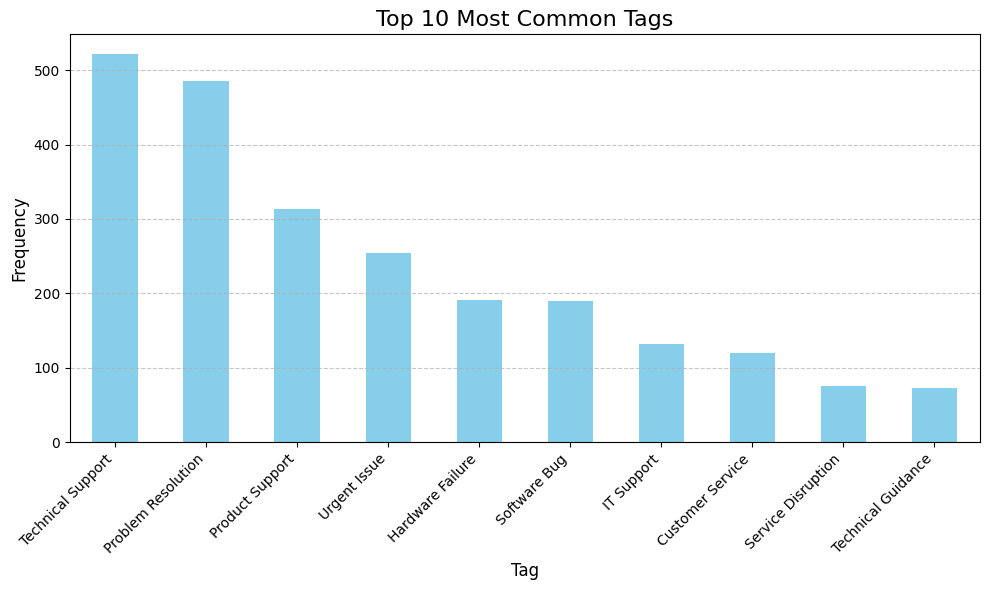

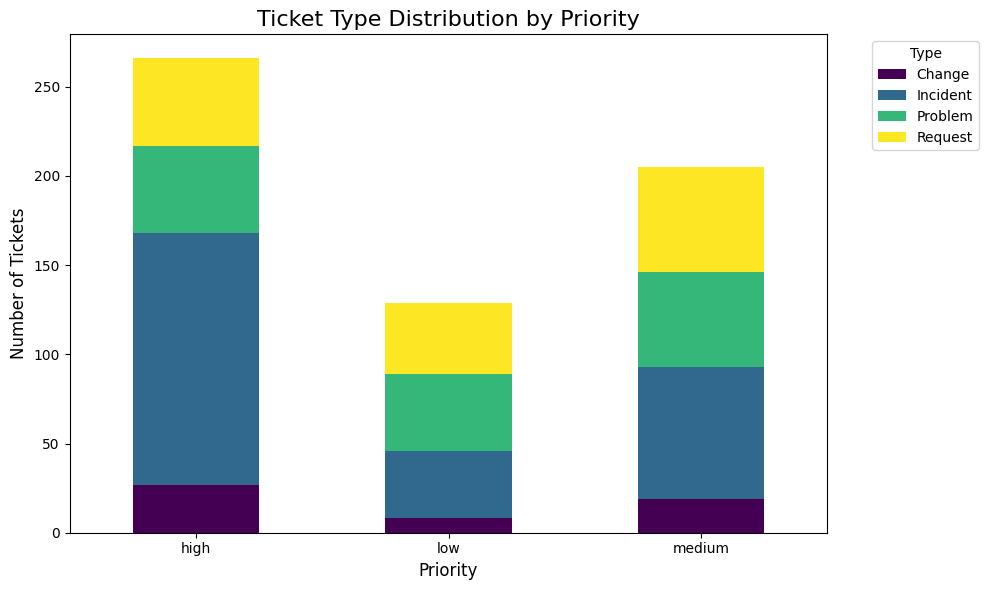

Tickets related to 'Software Bug' or 'Service Disruption': 240


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
helpdesk_data = pd.read_csv('helpdesk_customer_tickets.csv')

# Analyze tags to identify frequently occurring issues
tag_columns = [f'tag_{i}' for i in range(1, 10)]
tag_counts = helpdesk_data[tag_columns].stack().value_counts()

# Analyze ticket type distribution by priority
priority_distribution = helpdesk_data.groupby(['priority', 'type']).size().unstack(fill_value=0)

# Insight 1: Visualizing the most common tags
top_tags = tag_counts.head(10)
plt.figure(figsize=(10, 6))
top_tags.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Tags', fontsize=16)
plt.xlabel('Tag', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Insight 2: Distribution of ticket types by priority
priority_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Ticket Type Distribution by Priority', fontsize=16)
plt.xlabel('Priority', fontsize=12)
plt.ylabel('Number of Tickets', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Insight 3: Highlighting incidents with specific tags (e.g., Software Bug, Service Disruption)
specific_tags = ['Software Bug', 'Service Disruption']
specific_tag_counts = helpdesk_data[tag_columns].apply(lambda row: any(tag in specific_tags for tag in row), axis=1).sum()

print(f"Tickets related to 'Software Bug' or 'Service Disruption': {specific_tag_counts}")


In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset
helpdesk_data = pd.read_csv('helpdesk_customer_tickets.csv')

# Analyze ticket distribution by type
ticket_type_counts = helpdesk_data['type'].value_counts()

# Analyze tags to identify frequently occurring issues
tag_columns = [f'tag_{i}' for i in range(1, 10)]
tag_counts = helpdesk_data[tag_columns].stack().value_counts()

# Check priority distribution to see if specific issues correlate with "low" or "medium" priority
priority_distribution = helpdesk_data.groupby(['priority', 'type']).size().unstack(fill_value=0)

# Derive insights
insight_1 = "Insight 1: The most common ticket type is 'Incident' ({} occurrences), which indicates an opportunity to automate resolutions for repetitive incident-related issues.".format(ticket_type_counts.get('Incident', 0))
insight_2 = "Insight 2: The most frequent tags are 'Technical Support' ({} occurrences) and 'Problem Resolution' ({} occurrences). These tasks could be automated using AI chatbots or FAQ systems.".format(tag_counts.get('Technical Support', 0), tag_counts.get('Problem Resolution', 0))
insight_3 = "Insight 3: A significant number of incidents and problems are of medium or low priority, suggesting they can be addressed through automated troubleshooting systems."

# Display the results
print("--- Analysis Results ---")
print("\nTicket Type Counts:\n", ticket_type_counts)
print("\nTop 10 Tags:\n", tag_counts.head(10))
print("\nPriority Distribution by Type:\n", priority_distribution)
print("\n--- Derived Insights ---")
print(insight_1)
print(insight_2)
print(insight_3)

--- Analysis Results ---

Ticket Type Counts:
 type
Incident    253
Request     148
Problem     145
Change       54
Name: count, dtype: int64

Top 10 Tags:
 Technical Support     522
Problem Resolution    485
Product Support       314
Urgent Issue          254
Hardware Failure      191
Software Bug          190
IT Support            132
Customer Service      120
Service Disruption     76
Technical Guidance     73
Name: count, dtype: int64

Priority Distribution by Type:
 type      Change  Incident  Problem  Request
priority                                    
high          27       141       49       49
low            8        38       43       40
medium        19        74       53       59

--- Derived Insights ---
Insight 1: The most common ticket type is 'Incident' (253 occurrences), which indicates an opportunity to automate resolutions for repetitive incident-related issues.
Insight 2: The most frequent tags are 'Technical Support' (522 occurrences) and 'Problem Resolution' (485 